Notes from Chapter 1

@jmerort

Sep 2025

# 1 - The landscape of machine learning

Despite what its current popularity might suggest, machine learning has been widely used in computer science since the spam email filters of the 90s, and in later years with speech-to-text and automatic translation services. 

## 1.1 - What is machine learning?

Machine learning is the art of programming computers to learn to perform tasks from data. Two classic definitions are the following:

> [Machine learning] is the field of study that gives computers the ability to learn without being explicitly programmed.  
> — Arthur Samuel, 1959

> A computer program is said to learn from experience **E** with respect to a task **T** and a performance measure **R**, if its performance at **T**, as measured by **R**, improves with experience **E**.  
> — Tom Mitchell, 1997

If a computer system gets better at a certain task by doing it (or similar tasks) many times, it is a machine learning system.

## 1.2 - Advantages of machine learning

One of the main advantages of machine learning over traditional programming is the fact that, once a machine learning system has been built, it can modify how it works in response to changing data without being programmed to do so. This makes machine learning systems more resilient in changing environments, while requiring less effort on the part of the programmer.

There are also many problems for which an algorithm either hasn't been or can't be effectively developed, and thus can only be properly handeled using machine learning methods. Among such problems are image and speech recongition.

Lastly, the fact that machine learning can extract patterns over large quantities of data, which could never be analyzed by a person or many, means that, by studying how machine learning systems are trained on the data, we can obtain valuable information about it. This is called **data mining**.

## 1.3 - Types of machine learning systems

We will classify machine learning systems using 3 criteria:
- How the data is supervised during training
- Wether or not they can learn while they are working
- Wether they simply compare data points to each other or instead build predictive models

### 1.3.1 - Data supervision

In order to learn from data, a machine learning system can recieve semantic content as well as the "raw" data. For instance, emails used to train a spam detection filter will be given to the model labeled as spam or ham. This is known as **supervised learning**, as the model is given information as to what the data should be classified as. The values from which the machine learning system is supposed to extract the desired value are called **features** or **attributes**, and the desired values are called **labels** or **objectives**. For example, a car price prediction system might use as labels the car's motor type, brand and fuel consumption as features, while the car price would be its objective.

Supervised learning is usually divided into 2 groups, depending on the goal. If the goal is to classify a data point into a discrete set of categories, it's called **classification**; if the goal is to predict the value of a given numeric variable, it's called **regression**.

**Unsupervised learning** is learning done on unlabeled data. In this type of learning, the system does not know how it's supposed to divide the data, but instead looks for patterns and groups related data points into subsets. 

**Dimensionality reduction** is closely related to unsupervised learning; in it, the system is trained to reduce the number of features of the training data, while at the same time retaining as much information as possible. This is known as **feature extraction**. Another type of unsupervised learning is anomaly detection, in which the system is trained exclusively on data points considered to be normal, and is subsequently used to detect if new data fed to it is normal (similar to the data it was trained on) or not. 

Algorithms that can work on partially labeled datasets are called **semi-supervised learning** algorithms. They use a mixture of supervised and unsupervised techniques and can label new data points. For example, Google Photos can automatically detect the different persons that can be seen on your photos, and, if you tell the app which person is which in at least one photo, it can correctly label them in the rest.

**Auto-supervised learning** can generate a labeled dataset out of an unlabeled one. It will create its own labels based on the correlations it finds and then use them to label new data points on its own. Is is normally used for the same type of tasks that supervised learning is used, namely classification and regression, instead of those typical of unsupervised learning (dim. reduction, anomaly detection...)

**Reinforcement learning** is the most different of them all. In it, the learning model, called an agent, has a series of actions it can execute and recieves rewards and punishments (negative rewards) as consequences for performing each action on a given scenario. The system's goal is to develop a policy (set of actions to perform in each circumstance) that maximizes rewards over time. Reinforcement learning systems have been used to train robots to walk and to play games (AlphaGo being a notable example).

### 1.3.2 - Batch vs online learning

Some machine learning models are capable of learning while they are deployed and others are not. Systems that need to be trained with all the training data every time we want to modify their performance are called **batch learning** systems. They are the most common, but have some limitations:
- Real world data is constantly changing (in some use cases much faster than in others), and so the model's performance will tend to degrade over time if they are not regularly retrained.
- Training the model with all the training data requires a lot of time and resources, which severely limits the frequency with which these models can be retrained.
- Datasets can be very heavy, which means that, if our model runs on a modest computer, it will be difficult to retrain it.

To deal with the problems batch learning poses, we can use **online learning** models, which can learn from new instances after the model has been deployed, improving their performance on the go. Their training is done over individual instances or over mini-batches of the training data. This means each step of the training is fast and computationally light, which allows it to be performed online and in low resource machines.

Online learning systems are quicker to adapt, and thus work best in dynamic environments. Their **learning rate** determines how quickly they adapt to new data, giving us more rapidly changing or more conservative online learning models. This changing performance in response to new data can become a problem, as bad data (perhaps due to a technical failure or a malicious attack) can degrade the system's performance in real time, which will be noticed by users. Therefore, we ought to monitor the system closely and be very careful about which data enters it, even stopping the learning if we notice any significant degradation.

### 1.3.3 - Instance vs model-based learning

**Generalization** is the process by which a model uses information gathered from known data to make predictions (also called inferences) on unknown data. Depending on the way a type of model generalizes, they can be instance or model-based (model here being used in 2 distinct ways).

An **instance-based** machine learning model compares new data with the data it was trained on in order to make each inference. The best known example is the k-closest neighbors algorithm, which, when given a new data point to predict, looks for the $k$ points in the training dataset that resemble it the most in the value of their attributes, and then predicts the target value by taking the mean of the neighbors' values. 

A **model-based** approach, however, uses the training data to construct a model of the target variable, and then uses said model to make inferences on new data. Linear regression, in which a line is fit to a set of data points and then used to predict the value of a given variable, is a classic example of this.

The following example shows how to train and use a simple linear regression model using the **scikit-learn** library.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Download and prepare data
data_root = "https://github.com/ageron/data/raw/main/"
lifesat = pd.read_csv(data_root + "lifesat/lifesat.csv")

X = lifesat[["GDP per capita (USD)"]].values
y = lifesat[["Life satisfaction"]].values

# Visualize data
lifesat.plot(kind="scatter", grid="True", x="GDP per capita (USD)", y="Life satisfaction")
plt.axis([23_500, 62_500, 4, 9])
plt.show()
# Select a linear ML model
model = LinearRegression()

# Train model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[37_665.2]] # Cyprus' 2020 GDP per capita
print(f"Predicted happiness score = {model.predict(X_new)}")

## 1.4 - Main challenges of machine learning

Since machine learning is about training a learning algorithm on data, the main things that can go wrong are either bad data or bad algorithm. Both problems can appear in multiple ways.

### 1.4.1 - Bad data

Machine learning needs big quantities of data in order to work properly. Even simple problems usually require thousands of examples, and complex ones may require millions. An otherwise good model may not learn if the data that it's been trained on is not abundant enough.

Aside from containing enough examples, the training data must be representative, that is, it must be similar enough to the data that you wish to predict on. Sampling bias as well as a myriad of other causes can introduce unwanted information into the data, which may be learned by the model, resulting in unpredictable behavior.

Aside from being non-representative, data can also be of poor quality, due to errors in measurement, data collection, user inputs etc. Cleaning up the data before training is an extremely common machine learning task. This cleanup process might entail removing clear outliers, adding some missing fields or trying to fix datapoints in some way.

Lastly, the training data must contain enough relevant features and not too many irrelevant ones in order for our model to be able to train itself on it. The techniques of feature extraction are used for precisely this.

### 1.4.2 - Bad algorithms

Perhaps the most common problem with machine learning algorithms is **overfitting**. Overfitting occurs when a model performs well on the training data but poorly on never before seen instances. This means that the algorithm has somehow learned irrelevant features that are present in the training data, but not necessarily in real world examples.

You can generally create a model that performs arbitrarilly well on training data (particularly if your dataset is not very large), by using an arbitrarily complex algorithm that can learn very subtle patterns. That, however, is a bad idea, and will result in an overfit model that does not work on data it has never seen before.

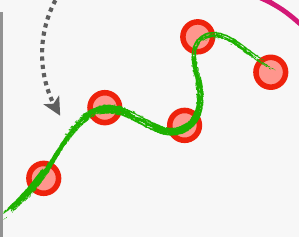

There is, therefore, an important tradeoff between the complexity of an algorithm (a complex one will be able to learn subtler and more complex patterns) and its simplicity (a simple one is less likely to overfit). Overfitting happens when a model is too complex relative to the noisiness of the training data, so 3 possible solutions are:
- Simplifying the model
- Gathering more data (hopefully without the noisy patterns)
- Reducing the noise of the data

Constraining a model to make it simpler and reduce the risk of overfitting is called **regularization**. It generally consists on giving the model less degrees of freedom (for example, reducing the slope of a linear regressor). The amount of regularization to be applied during training can be determined by a **hyperparameter**, which is a parameter, not of the model, but of the learning algorithm itself. Hyperparameters are chosen by the programmer before the training and are not modified during training, but insetad condition it.

**Underfitting** is the opposite of overfitting: it happens when the model is not complex enough to learn the relevant information from the training data. There are 2 main ways to fix this:
- Make the model more complex, by either reducing the amount of regularization or choosing a more powerful algorithm.
- Feed betetr features to the learning algorithm.

## 1.5 - Testing and validating

To measure the performance of a machine learning model before actually deploying it, a subset of the data, called the **test set**, is separated from the training data and fed to the model to see how well it performs on data that it's never seen before. The error rate on the test set is called **generalization error**, and it's a better estimate of the model's actual performance than the training error.

Usually, about 80% of the data is used for training and 20% for testing, but on very large datasets, the test set percentage can be much lower.

When trying to choose the best model, or the best hyperparameter values for a particular model, you might run into the problem that the model that performs the best on the dataset ends up underperforming on new data. This is because, by tuning the model to perform best on the test set, you are in a sense overfitting the model to it. The solution for this is **holdout validation**, that is, you separate part of the traning set, called the **validation set**, and train models with multiple hyperparameters on the reduced set, picking the best one based on their performance on the validation set. One chosen, you add the validation set to the trainign set again and train the best model on the full training set, evaluating its performance on the test set. 

This process might be problematic when the validation set is too small (not enough information to pick the best model) or too big (the training set with and without validation is too different). A way to solve this is **cross validation**, in which models are trained and evaluated using many small validation sets, averaging all the validations to get the best model. This process, however, multiplies the training time for the number of validation sets.